In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df=pd.read_csv('DataScience_salaries_2024.csv')
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021,MI,FT,Data Scientist,30400000,CLP,40038,CL,100,CL,L
1,2021,MI,FT,BI Data Analyst,11000000,HUF,36259,HU,50,US,L
2,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
3,2021,MI,FT,ML Engineer,8500000,JPY,77364,JP,50,JP,S
4,2022,SE,FT,Lead Machine Learning Engineer,7500000,INR,95386,IN,50,IN,L


## Exploratory data analysis

In [3]:
#non value
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [4]:
#data type of each column
df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [5]:
df.experience_level.unique()

array(['MI', 'SE', 'EN', 'EX'], dtype=object)

In [6]:
df.employment_type.unique()

array(['FT', 'FL', 'CT', 'PT'], dtype=object)

In [7]:
df.job_title.unique()

array(['Data Scientist', 'BI Data Analyst', 'ML Engineer',
       'Lead Machine Learning Engineer', 'Data Science Manager',
       'Head of Machine Learning', 'Research Engineer',
       'Head of Data Science', 'AI Programmer',
       'Machine Learning Engineer', 'Lead Data Scientist',
       'Data Engineer', 'Applied Machine Learning Scientist',
       'Lead Data Analyst', 'Data Analytics Manager',
       'Data Integration Specialist', 'Principal Data Architect',
       'NLP Engineer', 'Big Data Engineer', 'AI Research Engineer',
       'Machine Learning Software Engineer', 'Data Analyst',
       'Applied Data Scientist', 'AI Scientist', 'Data Analytics Lead',
       'Business Data Analyst', 'Product Data Analyst',
       'Computer Vision Engineer', 'Data Science Consultant',
       'AI Architect', 'Analytics Engineer', 'Machine Learning Scientist',
       'Research Scientist', 'Prompt Engineer',
       'Principal Data Scientist', 'Applied Scientist',
       'Deep Learning Engineer', 

In [8]:
def categorize_job_title(title):
    title_lower = title.lower()
    if "analyst" in title_lower:
        return "Data Analysis"
    elif "scientist" in title_lower:
        return "Data Science"
    elif "engineer" in title_lower and "ml" in title_lower:
        return "Machine Learning"
    elif "engineer" in title_lower:
        return "Data Engineering"
    elif "manager" in title_lower or "director" in title_lower or "lead" in title_lower:
        return "Leadership"
    elif "ai" in title_lower or "deep learning" in title_lower or "researcher" in title_lower:
        return "Specialized Roles"
    else:
        return "Other"

# Apply the categorization function to the dataset
df['job_category'] = df['job_title'].apply(categorize_job_title)

In [9]:
df.job_category.unique()

array(['Data Science', 'Data Analysis', 'Machine Learning',
       'Data Engineering', 'Leadership', 'Other', 'Specialized Roles'],
      dtype=object)

In [10]:
df=df.drop(columns=['job_title', 'salary', 'salary_currency'] )
df.head()

,work_year,experience_level,employment_type,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_category
0,2021,MI,FT,40038,CL,100,CL,L,Data Science
1,2021,MI,FT,36259,HU,50,US,L,Data Analysis
2,2020,MI,FT,35735,HU,50,HU,L,Data Science
3,2021,MI,FT,77364,JP,50,JP,S,Machine Learning
4,2022,SE,FT,95386,IN,50,IN,L,Data Engineering


## Visualization

(array([ 90000., 100000., 110000., 120000., 130000., 140000., 150000.,
        160000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

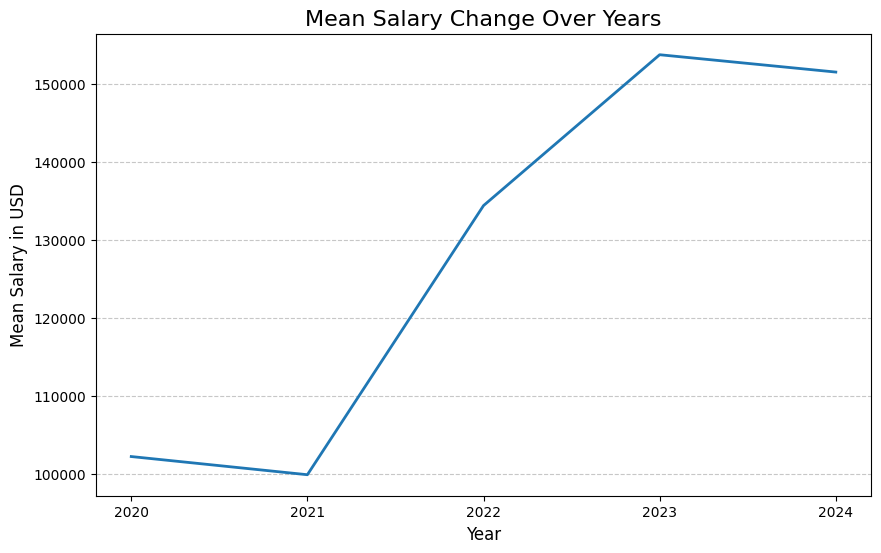

In [48]:
mean_salary_by_year = df.groupby('work_year')['salary_in_usd'].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.plot(np.array(mean_salary_by_year['work_year']), np.array(mean_salary_by_year['salary_in_usd']), linewidth=2)
plt.title("Mean Salary Change Over Years", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Mean Salary in USD", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(mean_salary_by_year['work_year'], fontsize=10)
plt.yticks(fontsize=10)

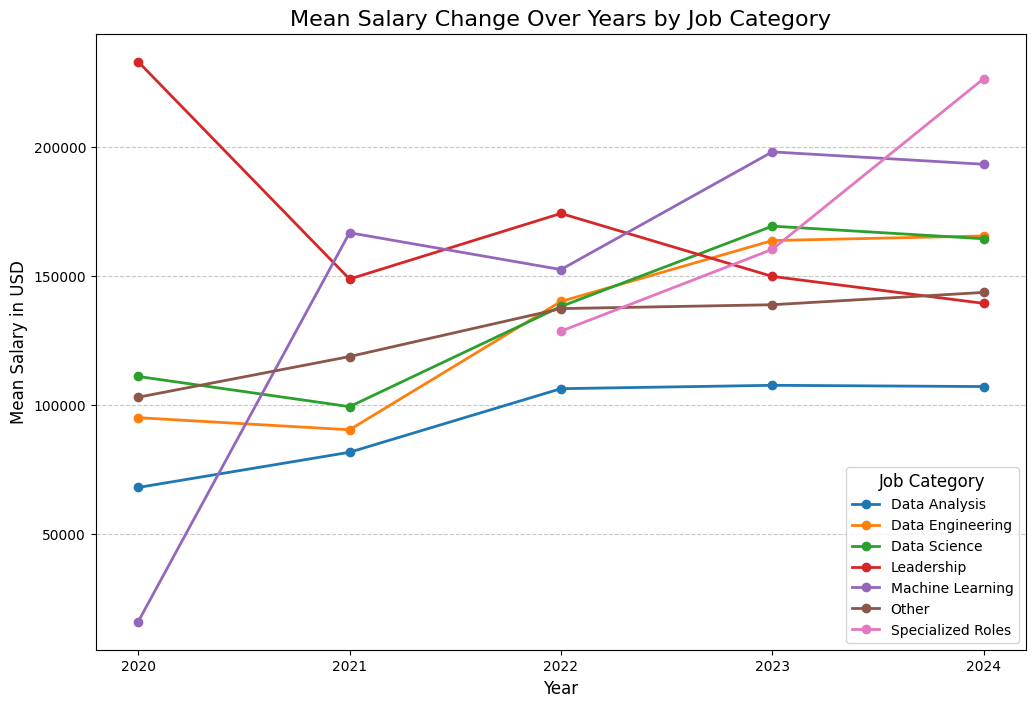

In [ ]:
mean_salary_by_year_category = df.groupby(['work_year', 'job_category'])['salary_in_usd'].mean().reset_index()
plt.figure(figsize=(12, 8))
for category in mean_salary_by_year_category['job_category'].unique():
    category_data = mean_salary_by_year_category[mean_salary_by_year_category['job_category'] == category]
    plt.plot(
        category_data['work_year'],
        category_data['salary_in_usd'],
        marker='o',
        label=category,
        linewidth=2
    )
plt.title("Mean Salary Change Over Years by Job Category", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Mean Salary in USD", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(mean_salary_by_year_category['work_year'].unique(), fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title="Job Category", fontsize=10, title_fontsize=12)

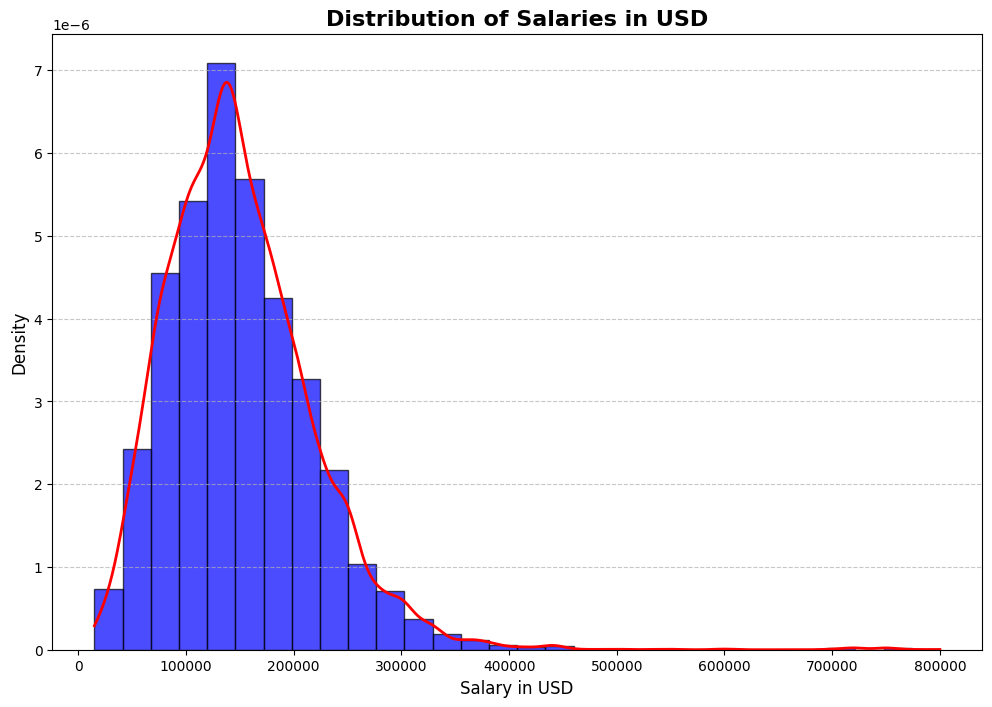

In [12]:
plt.figure(figsize=(12, 8))  # Larger figure size for better clarity
plt.hist(df['salary_in_usd'], bins=30, alpha=0.7, edgecolor='black', density=True, color='blue')  # Histogram
plt.title("Distribution of Salaries in USD", fontsize=16, fontweight='bold')
plt.xlabel("Salary in USD", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
density = gaussian_kde(df['salary_in_usd'])
x_vals = np.linspace(df['salary_in_usd'].min(), df['salary_in_usd'].max(), 1000)
plt.plot(x_vals, density(x_vals), color='red', linewidth=2, label='KDE')

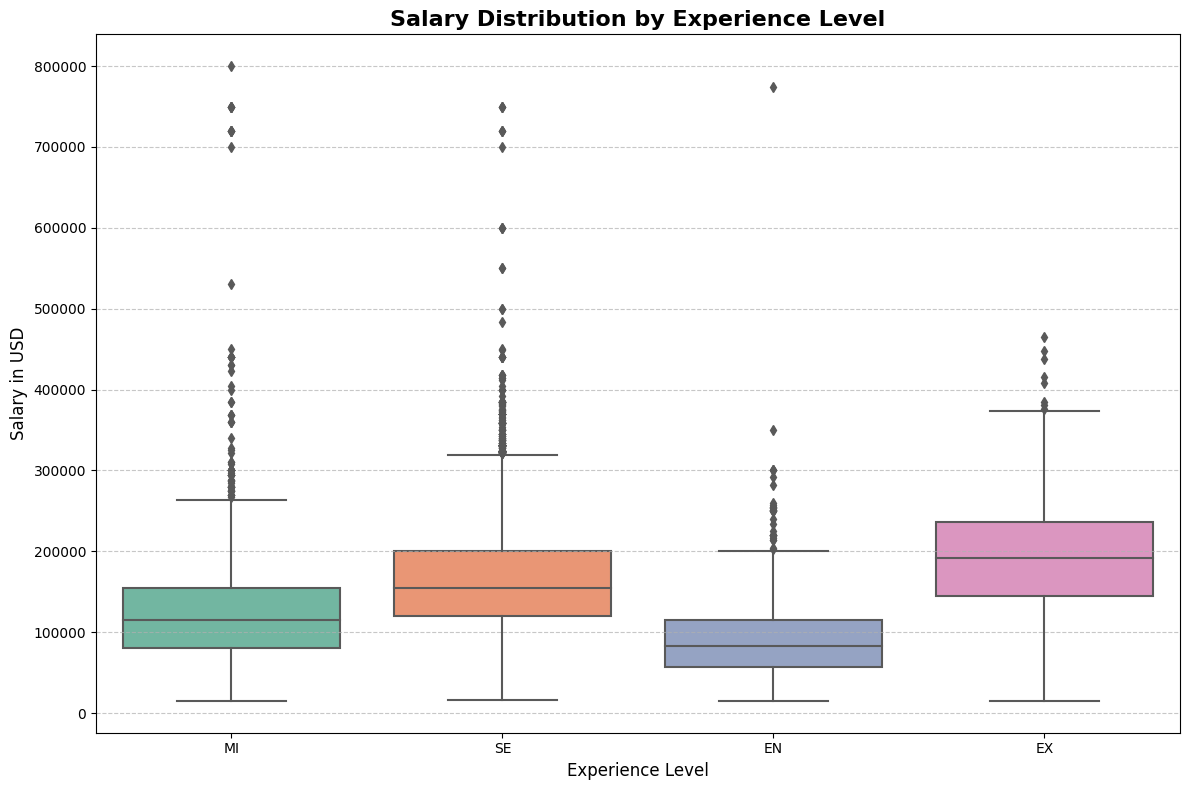

In [13]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='experience_level', y='salary_in_usd', palette="Set2")
plt.title("Salary Distribution by Experience Level", fontsize=16, fontweight='bold')
plt.xlabel("Experience Level", fontsize=12)
plt.ylabel("Salary in USD", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

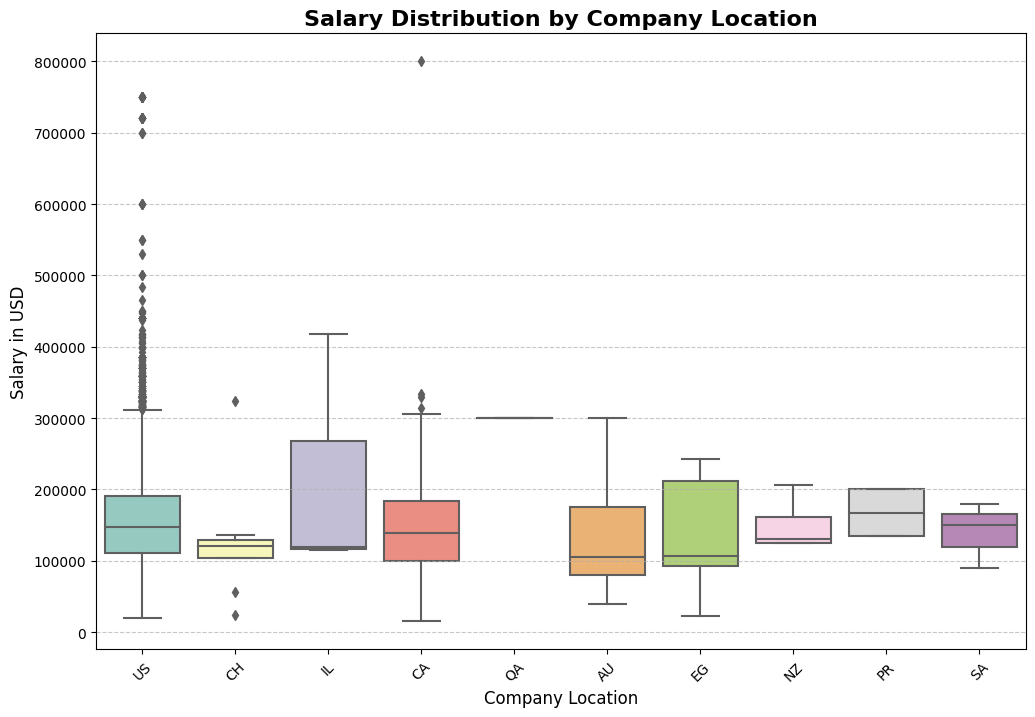

In [14]:
plt.figure(figsize=(12, 8))
top_locations = df.groupby('company_location')['salary_in_usd'].median().nlargest(10).index
filtered_data = df[df['company_location'].isin(top_locations)]
sns.boxplot(data=filtered_data, x='company_location', y='salary_in_usd', palette="Set3")
plt.title("Salary Distribution by Company Location", fontsize=16, fontweight='bold')
plt.xlabel("Company Location", fontsize=12)
plt.ylabel("Salary in USD", fontsize=12)
plt.xticks(rotation=45, fontsize=10)  
plt.grid(axis='y', linestyle='--', alpha=0.7)

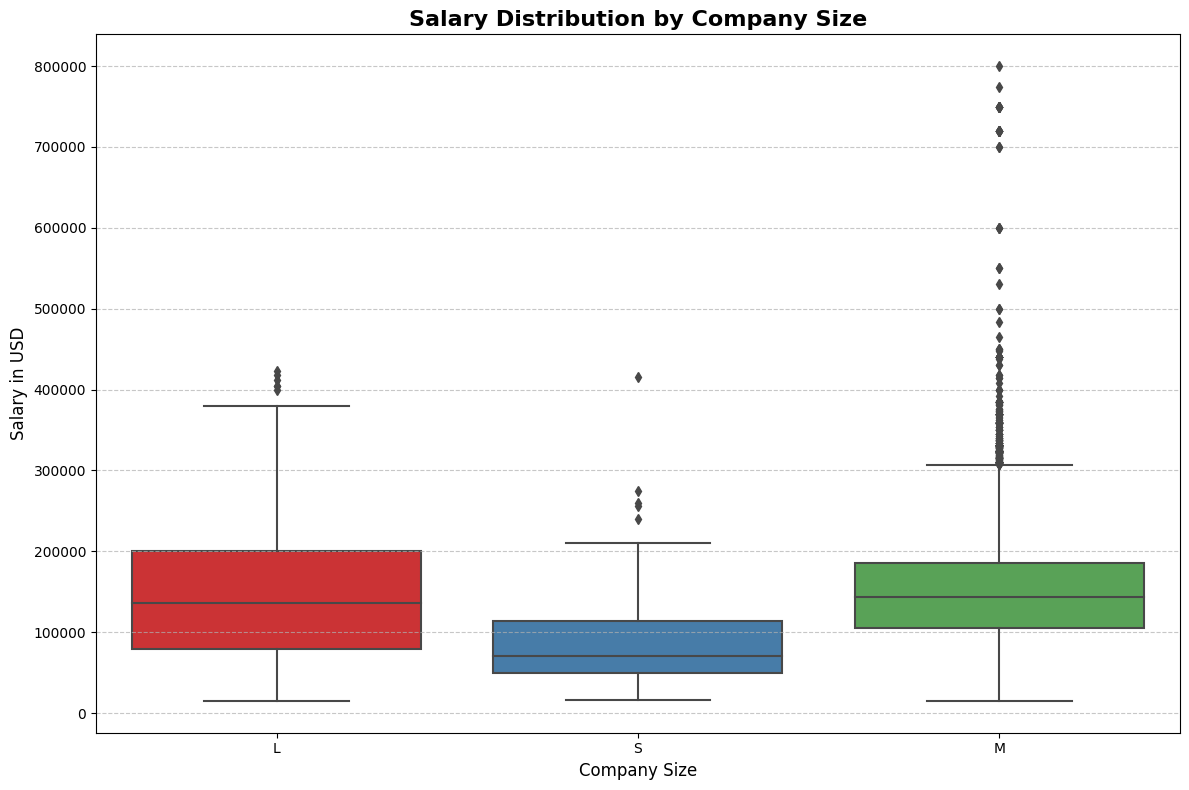

In [15]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='company_size', y='salary_in_usd', palette="Set1")

plt.title("Salary Distribution by Company Size", fontsize=16, fontweight='bold')
plt.xlabel("Company Size", fontsize=12)
plt.ylabel("Salary in USD", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

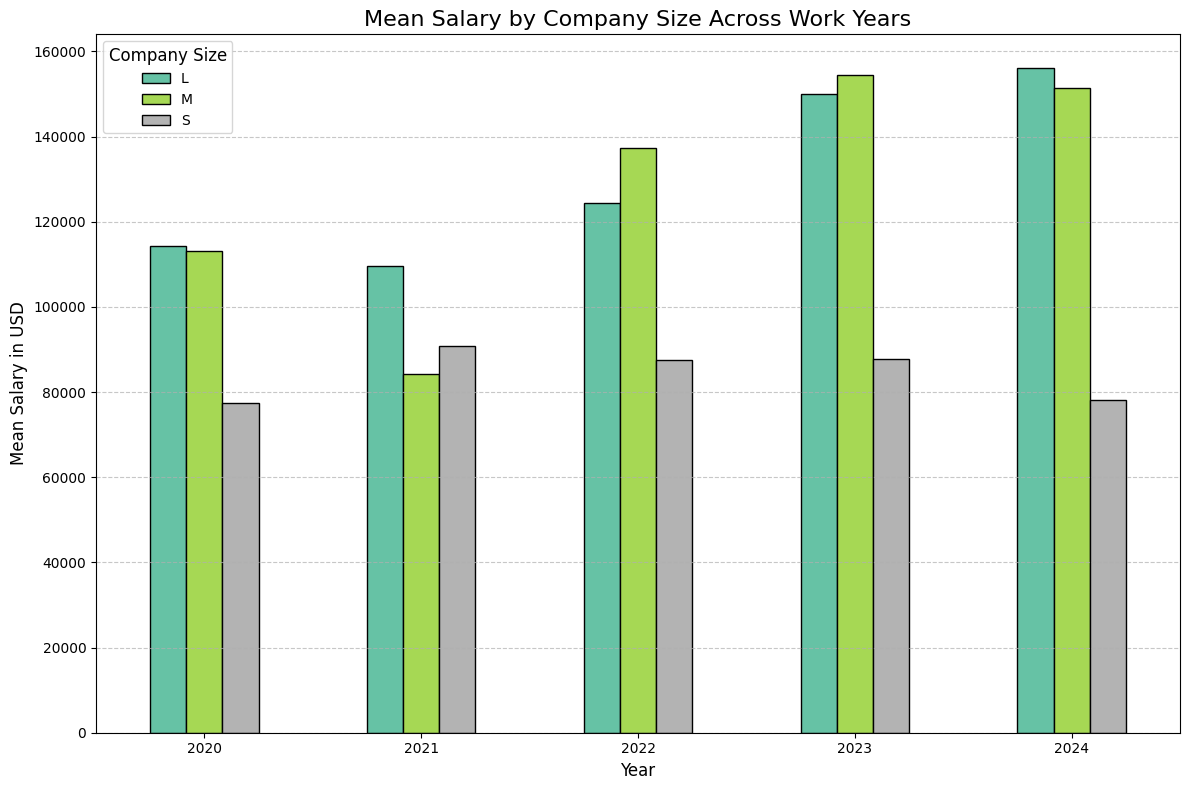

In [16]:
mean_salary_by_size_year = df.groupby(['work_year', 'company_size'])['salary_in_usd'].mean().unstack()

mean_salary_by_size_year.plot(
    kind='bar',
    figsize=(12, 8),
    edgecolor='black',
    colormap='Set2'
)

plt.title("Mean Salary by Company Size Across Work Years", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Mean Salary in USD", fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.legend(title="Company Size", fontsize=10, title_fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

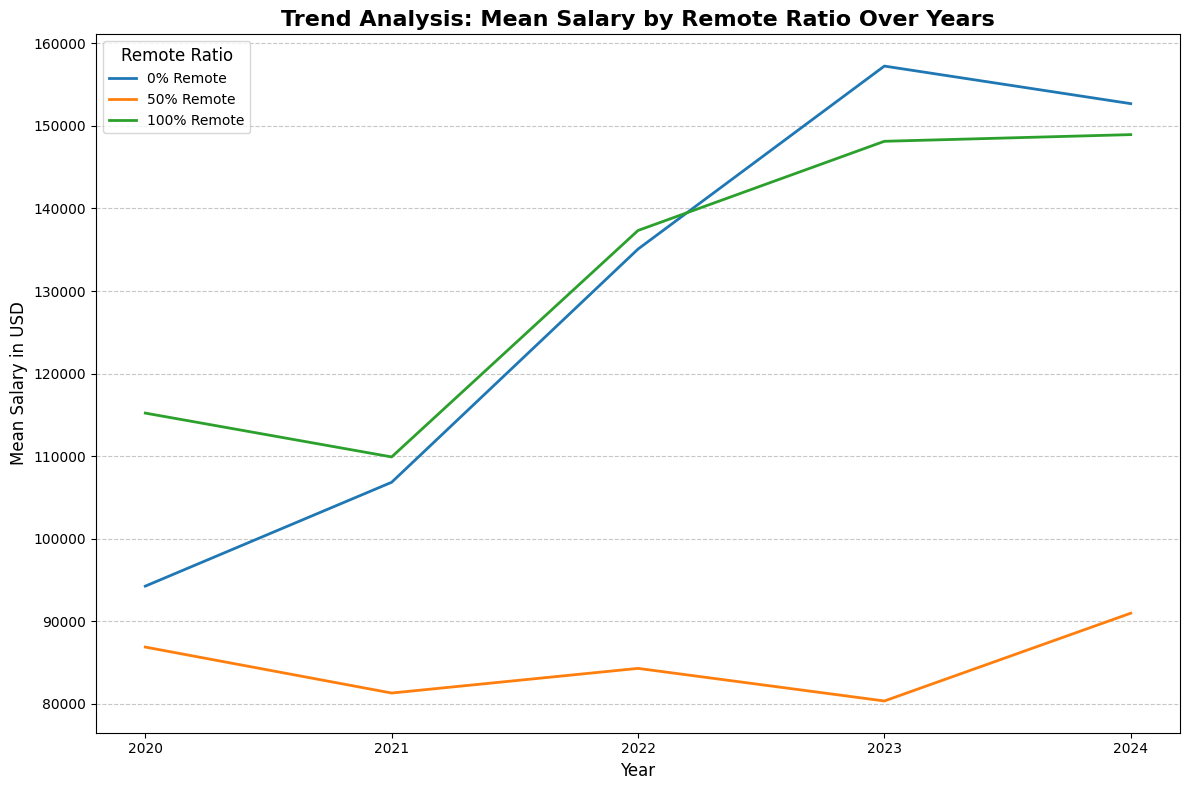

In [49]:
mean_salary_by_year_remote = df.groupby(['work_year', 'remote_ratio'])['salary_in_usd'].mean().reset_index()
plt.figure(figsize=(12, 8))
for remote_ratio in mean_salary_by_year_remote['remote_ratio'].unique():
    remote_data = mean_salary_by_year_remote[mean_salary_by_year_remote['remote_ratio'] == remote_ratio]
    plt.plot(
        np.array(remote_data['work_year']),
        np.array(remote_data['salary_in_usd']),
        label=f"{remote_ratio}% Remote",
        linewidth=2
    )
plt.title("Trend Analysis: Mean Salary by Remote Ratio Over Years", fontsize=16, fontweight='bold')
plt.xlabel("Year", fontsize=12)
plt.ylabel("Mean Salary in USD", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(mean_salary_by_year_remote['work_year'].unique(), fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title="Remote Ratio", fontsize=10, title_fontsize=12)
plt.tight_layout()

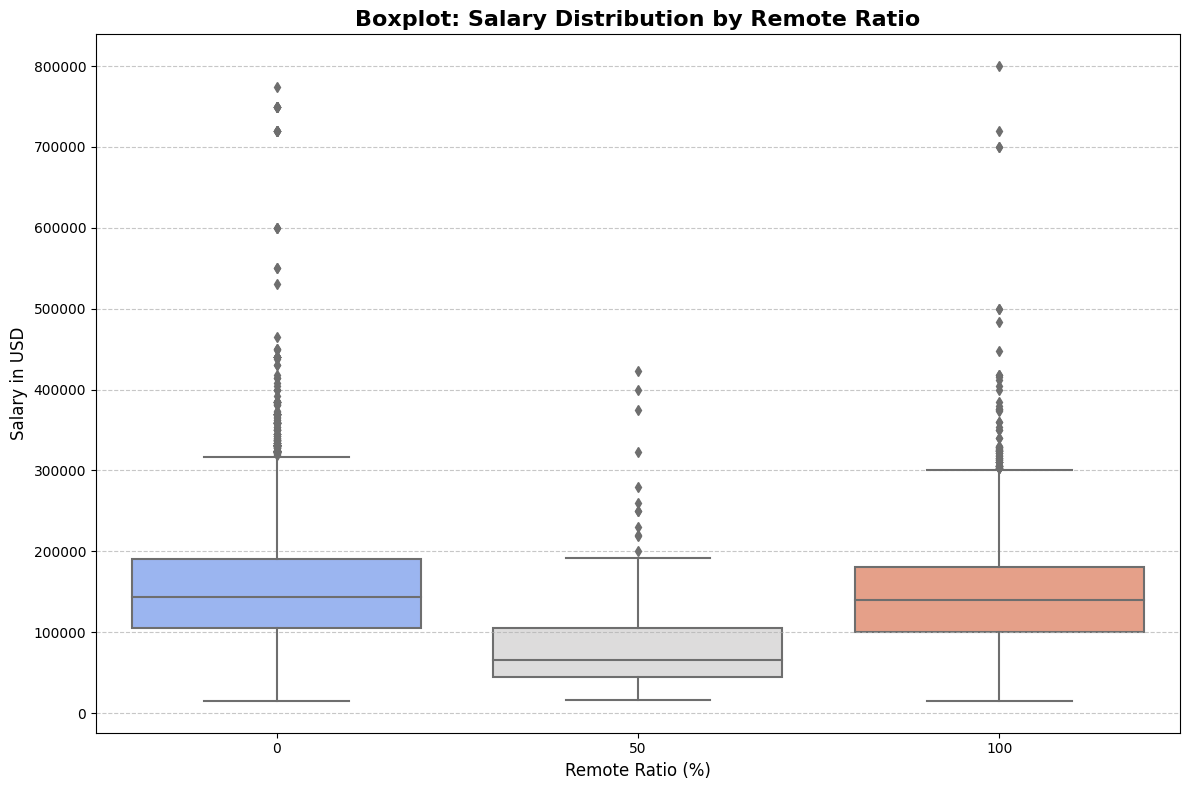

In [18]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='remote_ratio', y='salary_in_usd', palette="coolwarm")

plt.title("Boxplot: Salary Distribution by Remote Ratio", fontsize=16, fontweight='bold')
plt.xlabel("Remote Ratio (%)", fontsize=12)
plt.ylabel("Salary in USD", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

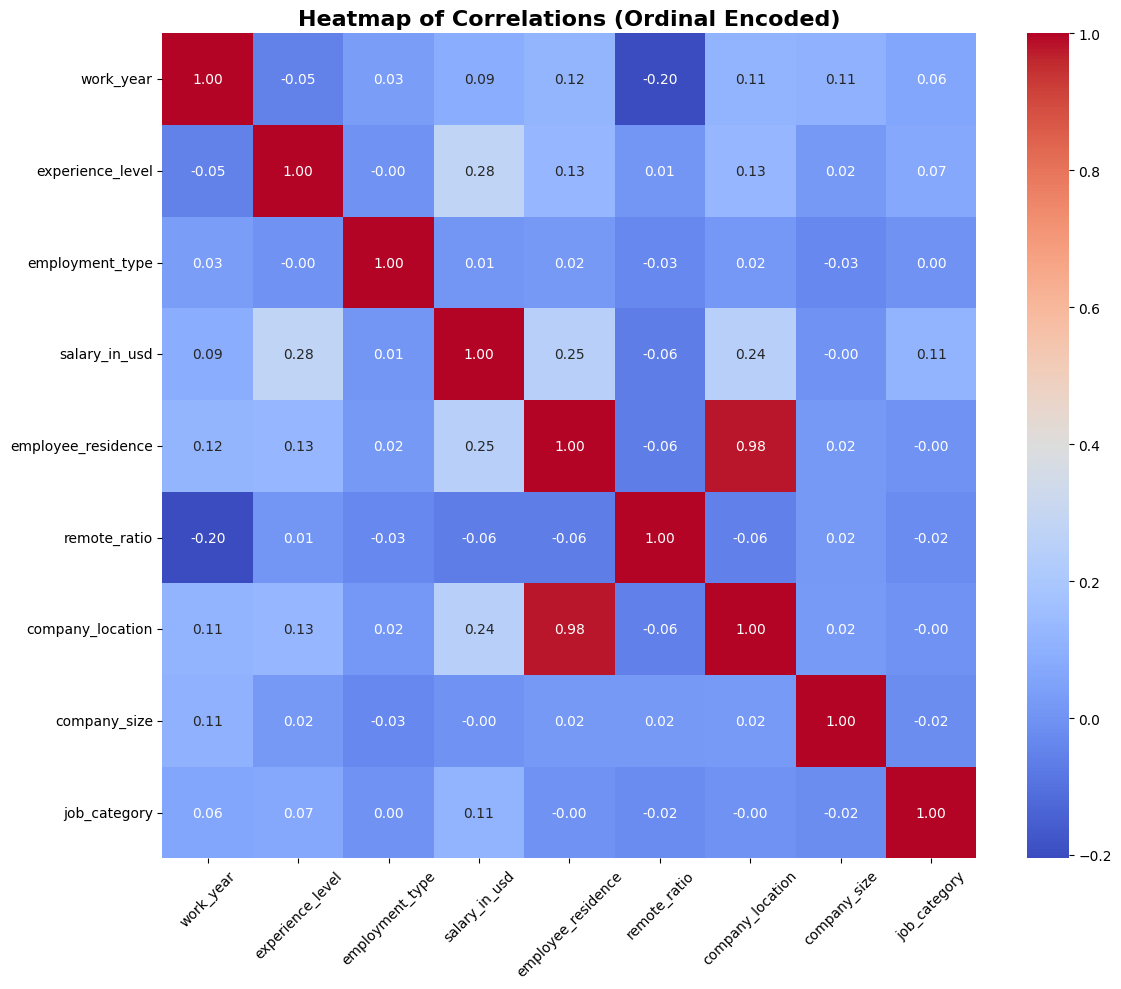

In [19]:
non_numeric_columns = df.select_dtypes(include=['object']).columns
encoder = OrdinalEncoder()
data = df.copy()
data[non_numeric_columns] = encoder.fit_transform(df[non_numeric_columns])
correlation_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Heatmap of Correlations (Ordinal Encoded)", fontsize=16, fontweight='bold')
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.tight_layout()

## Baseline model

In [82]:
df.head()

,work_year,experience_level,employment_type,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_category
0,2021,MI,FT,40038,CL,100,CL,L,Data Science
1,2021,MI,FT,36259,HU,50,US,L,Data Analysis
2,2020,MI,FT,35735,HU,50,HU,L,Data Science
3,2021,MI,FT,77364,JP,50,JP,S,Machine Learning
4,2022,SE,FT,95386,IN,50,IN,L,Data Engineering


In [83]:
X = df[['work_year','experience_level', 'employee_residence','remote_ratio','company_location','job_category']]
y = df['salary_in_usd']

In [84]:
categorical_columns = ['work_year','experience_level', 'employee_residence','company_location','job_category']
ordinal_encoder = OrdinalEncoder()
X[categorical_columns] = ordinal_encoder.fit_transform(X[categorical_columns])


/var/folders/c2/1r7zq2xn0bg3cry7w948f63c0000gn/T/ipykernel_3041/3304137767.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[categorical_columns] = ordinal_encoder.fit_transform(X[categorical_columns])


In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R^2 Score: {r2}")

Root Mean Squared Error (RMSE): 63849.25782988631
R^2 Score: 0.13577888660053616


# RandomForestRegressor

In [86]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R^2 Score: {r2}")

Root Mean Squared Error (RMSE): 58385.11726875089
R^2 Score: 0.2773675182181784


# RandomForestRegressor with less feature

In [87]:
X = df[['experience_level', 'employee_residence','company_location','job_category']]
y = df['salary_in_usd']
categorical_columns = ['experience_level', 'employee_residence','company_location','job_category']
ordinal_encoder = OrdinalEncoder()
X[categorical_columns] = ordinal_encoder.fit_transform(X[categorical_columns])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

/var/folders/c2/1r7zq2xn0bg3cry7w948f63c0000gn/T/ipykernel_3041/1616663497.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[categorical_columns] = ordinal_encoder.fit_transform(X[categorical_columns])


In [88]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R^2 Score: {r2}")

Root Mean Squared Error (RMSE): 58643.15340430655
R^2 Score: 0.2709659779484924


# xgboost

In [89]:
model = XGBRegressor(n_estimators=1000, learning_rate=0.05, max_depth=7, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R^2 Score: {r2}")

Root Mean Squared Error (RMSE): 58747.70152091251
R^2 Score: 0.2683642394446264
